# Building Machine Learning Models in Python with scikit-learn
<br>
Chapter 2, from Pluralsight course

In [1]:
import pandas as pd
print(pd.__version__)

1.0.3


In [4]:
exam_data = pd.read_csv('../data/exams.csv', quotechar='"')
exam_data.head()


gender race/ethnicity parental level of education         lunch  \
0    male        group E          associate's degree      standard   
1  female        group C          associate's degree  free/reduced   
2    male        group D           bachelor's degree      standard   
3  female        group A           bachelor's degree      standard   
4  female        group D                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed          79             75             81  
1                    none          56             65             64  
2                    none          86             68             74  
3                    none          68             78             76  
4                    none          49             68             61

In [5]:
math_avg = exam_data['math score'].mean()
reading_avg =exam_data['reading score'].mean()
writing_avg = exam_data['writing score'].mean()

In [6]:
from sklearn import preprocessing

In [9]:
#standardization
exam_data[['math score']] = preprocessing.scale(exam_data[['math score']])
exam_data[['reading score']] = preprocessing.scale(exam_data[['reading score']])
exam_data[['writing score']] = preprocessing.scale(exam_data[['writing score']])


In [10]:
exam_data


gender race/ethnicity parental level of education         lunch  \
0     male        group E          associate's degree      standard   
1   female        group C          associate's degree  free/reduced   
2     male        group D           bachelor's degree      standard   
3   female        group A           bachelor's degree      standard   
4   female        group D                 high school  free/reduced   
..     ...            ...                         ...           ...   
95  female        group A             master's degree  free/reduced   
96  female        group D                 high school  free/reduced   
97  female        group C                some college      standard   
98    male        group D            some high school      standard   
99  female        group A             master's degree  free/reduced   

   test preparation course  math score  reading score  writing score  
0                completed    0.994557       0.574138       1.049901  
1                     none   -0.646391      -0.169564      -0.178476  
2                     none    1.493976       0.053547       0.544099  
3                     none    0.209756       0.797248       0.688613  
4                     none   -1.145810       0.053547      -0.395248  
..                     ...         ...            ...            ...  
95               completed   -0.432354       0.648508       0.977643  
96                    none   -0.361008      -0.392675      -0.395248  
97                    none    0.281101       1.094729       1.194416  
98                    none    1.708013       1.169099       0.905386  
99               completed   -0.004281       1.540950       1.555703  

[100 rows x 8 columns]

In [12]:
math_avg = exam_data['math score'].mean()
reading_avg =exam_data['reading score'].mean()
writing_avg = exam_data['writing score'].mean()

print(math_avg)
print(reading_avg)
print(writing_avg)

-2.203098814490545e-18
-1.4432899320127036e-16
6.217248937900877e-17


In [15]:
le = preprocessing.LabelEncoder()
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))


In [16]:
exam_data.head()

gender race/ethnicity parental level of education         lunch  \
0       1        group E          associate's degree      standard   
1       0        group C          associate's degree  free/reduced   
2       1        group D           bachelor's degree      standard   
3       0        group A           bachelor's degree      standard   
4       0        group D                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed    0.994557       0.574138       1.049901  
1                    none   -0.646391      -0.169564      -0.178476  
2                    none    1.493976       0.053547       0.544099  
3                    none    0.209756       0.797248       0.688613  
4                    none   -1.145810       0.053547      -0.395248

In [17]:
le.classes_

array(['female', 'male'], dtype=object)

In [18]:
exam_data = pd.get_dummies(exam_data, columns=['race/ethnicity'])
exam_data

gender parental level of education         lunch test preparation course  \
0        1          associate's degree      standard               completed   
1        0          associate's degree  free/reduced                    none   
2        1           bachelor's degree      standard                    none   
3        0           bachelor's degree      standard                    none   
4        0                 high school  free/reduced                    none   
..     ...                         ...           ...                     ...   
95       0             master's degree  free/reduced               completed   
96       0                 high school  free/reduced                    none   
97       0                some college      standard                    none   
98       1            some high school      standard                    none   
99       0             master's degree  free/reduced               completed   

    math score  reading score  writing score  race/ethnicity_group A  \
0     0.994557       0.574138       1.049901                       0   
1    -0.646391      -0.169564      -0.178476                       0   
2     1.493976       0.053547       0.544099                       0   
3     0.209756       0.797248       0.688613                       1   
4    -1.145810       0.053547      -0.395248                       0   
..         ...            ...            ...                     ...   
95   -0.432354       0.648508       0.977643                       1   
96   -0.361008      -0.392675      -0.395248                       0   
97    0.281101       1.094729       1.194416                       0   
98    1.708013       1.169099       0.905386                       0   
99   -0.004281       1.540950       1.555703                       1   

    race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                        0                       0                       0   
1                        0                       1                       0   
2                        0                       0                       1   
3                        0                       0                       0   
4                        0                       0                       1   
..                     ...                     ...                     ...   
95                       0                       0                       0   
96                       0                       0                       1   
97                       0                       1                       0   
98                       0                       0                       1   
99                       0                       0                       0   

    race/ethnicity_group E  
0                        1  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
95                       0  
96                       0  
97                       0  
98                       0  
99                       0  

[100 rows x 12 columns]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
corpus = ['this is the first document.',
         'this is the second document.',
         'third document. Document number three.',
         'Number four. To repeat, number four.']

In [26]:
vectorizer = CountVectorizer()

bag_words = vectorizer.fit_transform(corpus)

In [27]:
bag_words

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [28]:
print(bag_words)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 0)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 0)	1
  (1, 6)	1
  (2, 0)	2
  (2, 8)	1
  (2, 4)	1
  (2, 10)	1
  (3, 4)	2
  (3, 2)	2
  (3, 11)	1
  (3, 5)	1


In [31]:
vectorizer.vocabulary_.get('document')

0

In [32]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [34]:
word_df = pd.DataFrame(bag_words.toarray(), columns =vectorizer.get_feature_names())

In [35]:
word_df

document  first  four  is  number  repeat  second  the  third  this  three  \
0         1      1     0   1       0       0       0    1      0     1      0   
1         1      0     0   1       0       0       1    1      0     1      0   
2         2      0     0   0       1       0       0    0      1     0      1   
3         0      0     2   0       2       1       0    0      0     0      0   

   to  
0   0  
1   0  
2   0  
3   1

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer()

In [38]:
bag_word2 = vectorizer.fit_transform(corpus)
bag_word2

<4x12 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [39]:
print(bag_word2)

  (0, 0)	0.3528554929793508
  (0, 1)	0.5528163151092931
  (0, 7)	0.43584673254990375
  (0, 3)	0.43584673254990375
  (0, 9)	0.43584673254990375
  (1, 6)	0.5528163151092931
  (1, 0)	0.3528554929793508
  (1, 7)	0.43584673254990375
  (1, 3)	0.43584673254990375
  (1, 9)	0.43584673254990375
  (2, 10)	0.4850008395708102
  (2, 4)	0.3823802326982809
  (2, 8)	0.4850008395708102
  (2, 0)	0.6191395067937654
  (3, 5)	0.3432724906138499
  (3, 11)	0.3432724906138499
  (3, 2)	0.6865449812276998
  (3, 4)	0.5412799489419371


In [40]:
vectorizer.vocabulary_.get('document')

0

In [41]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [43]:
pd.DataFrame(bag_word2.toarray(), columns = vectorizer.get_feature_names())

document     first      four        is   number    repeat    second  \
0  0.352855  0.552816  0.000000  0.435847  0.00000  0.000000  0.000000   
1  0.352855  0.000000  0.000000  0.435847  0.00000  0.000000  0.552816   
2  0.619140  0.000000  0.000000  0.000000  0.38238  0.000000  0.000000   
3  0.000000  0.000000  0.686545  0.000000  0.54128  0.343272  0.000000   

        the     third      this     three        to  
0  0.435847  0.000000  0.435847  0.000000  0.000000  
1  0.435847  0.000000  0.435847  0.000000  0.000000  
2  0.000000  0.485001  0.000000  0.485001  0.000000  
3  0.000000  0.000000  0.000000  0.000000  0.343272

In [44]:
from sklearn.feature_extraction.text import HashingVectorizer

In [46]:
vectorizer = HashingVectorizer(n_features=8)

feature_vector = vectorizer.fit_transform(corpus)

print(feature_vector)



  (0, 0)	-0.8944271909999159
  (0, 5)	0.4472135954999579
  (0, 6)	0.0
  (1, 0)	-0.5773502691896258
  (1, 3)	0.5773502691896258
  (1, 5)	0.5773502691896258
  (1, 6)	0.0
  (2, 0)	-0.7559289460184544
  (2, 3)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (2, 7)	0.3779644730092272
  (3, 0)	0.31622776601683794
  (3, 3)	0.31622776601683794
  (3, 5)	0.6324555320336759
  (3, 7)	0.6324555320336759


In [47]:
!pip install opencv-python

off   doskey tmc=java -jar tmc.jar $*


In [48]:
import cv2

In [50]:
imagePath = '../data/dog.jpg'
image = cv2.imread(imagePath)

In [51]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

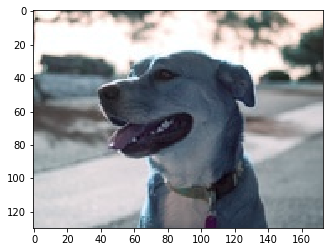

In [52]:
plt.imshow(image)

In [53]:
image.shape

(130, 173, 3)

In [54]:
image.size

67470

In [55]:
image[0][0]

array([199, 171, 164], dtype=uint8)

In [56]:
size =(32,32)

In [59]:
resize_image = cv2.resize(image, size)

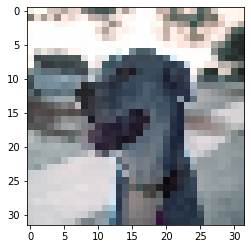

In [60]:
plt.imshow(resize_image)

In [61]:
resize_image.shape

(32, 32, 3)

In [62]:
flattened_resize_image = resize_image.flatten()
flattened_resize_image

array([244, 237, 228, ...,  99, 112, 118], dtype=uint8)

In [63]:
len(flattened_resize_image)

3072

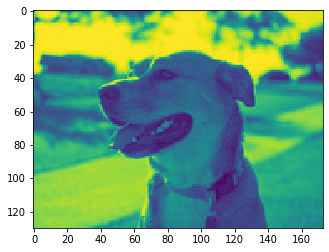

In [65]:
image_grayscale = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
plt.imshow(image_grayscale)

In [66]:
image_grayscale.shape

(130, 173)

In [67]:
image_grayscale

array([[172, 206, 237, ..., 241, 242, 242],
       [196, 209, 235, ..., 242, 243, 242],
       [208, 209, 229, ..., 242, 242, 241],
       ...,
       [207, 203, 202, ..., 112, 113, 112],
       [203, 205, 206, ..., 115, 119, 116],
       [202, 203, 205, ..., 118, 123, 120]], dtype=uint8)

In [68]:
import numpy as np

In [71]:
expanded_grayscale_image = np.expand_dims(image_grayscale, axis=2)

In [72]:
expanded_grayscale_image.shape

(130, 173, 1)

In [73]:
expanded_grayscale_image

array([[[172],
        [206],
        [237],
        ...,
        [241],
        [242],
        [242]],

       [[196],
        [209],
        [235],
        ...,
        [242],
        [243],
        [242]],

       [[208],
        [209],
        [229],
        ...,
        [242],
        [242],
        [241]],

       ...,

       [[207],
        [203],
        [202],
        ...,
        [112],
        [113],
        [112]],

       [[203],
        [205],
        [206],
        ...,
        [115],
        [119],
        [116]],

       [[202],
        [203],
        [205],
        ...,
        [118],
        [123],
        [120]]], dtype=uint8)